<a href="https://colab.research.google.com/github/mvdheram/DeepLearning-Notebooks/blob/main/Introduction_to_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensor

* Generalization of vectors and matrices to potentially higer dimentions.

* Dimentions or axes can be arbitrary (>3).



In [ ]:
# Defining tensors in tensorflow

import tensorflow as tf

# 0D Tensor
d0 = tf.ones((1,))

# 1D Tensor
d1 = tf.ones((2,2))

# 3D Tensor
d3 = tf.ones((1,2,3)) # 2 rows, 3 columns of 1 tensor (perspective of breadth face of cube) / 1x2 of 3 tensors (perspective of length face of cube)

print(d3.numpy())

[[[1. 1. 1.]
  [1. 1. 1.]]]


# Defining constans in TensorFlow

* Simplest category of tensor.
  * Immutable.
  * Can have higher dimentions.


In [ ]:
from tensorflow import constant

# 2x3 constant of 3's
a = constant(3, shape=[2,3])

# 2x2 constant constructed from 1D tensor
b = constant([1,2,3,4,],shape=[2,2])

print(a , "\n \n", b)

tf.Tensor(
[[3 3 3]
 [3 3 3]], shape=(2, 3), dtype=int32) 
 
 tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)


# Defining and initializing variables

* Shared, persistent and modifiable.

* Data type and shape are fixed during initialization.


In [ ]:
import tensorflow as tf

a0 = tf.Variable([1,2,3,4,5,6], dtype=tf.float32)
a1 = tf.Variable([1,2,3,4,5,6], dtype=tf.int16)  

print(a0 , "\n \n", a1)

<tf.Variable 'Variable:0' shape=(6,) dtype=float32, numpy=array([1., 2., 3., 4., 5., 6.], dtype=float32)> 
 
 <tf.Variable 'Variable:0' shape=(6,) dtype=int16, numpy=array([1, 2, 3, 4, 5, 6], dtype=int16)>


# Basic Operations in TF

* Computation based on graphs. 
* TF graph contains edges and nodes
  *  Edges = tensors
  * Nodes = operations
  


## Addition operator

* `add()` operation performs ***element-wise addition*** with two tensors.

* Can be performed using `+`.

**Condition** : Tensors should have **same shape.**



In [ ]:
from tensorflow import constant, add


# 0D tensors
a0 = constant([1])
b0 = constant([2])

# 1D tensors
a1 = constant([1,2])
b1 = constant([3,4])

# 2D tensors
a2 = constant([[1,2],[3,4]])
b2 = constant([[5,6], [7,8]]) 

# Scalar addition 
c0 = add(a0,b0)

# Vector addition
c1 = add(a1,b1)

# Matrix addition
c2 = add(a2,b2) 

print(c0 , "\n \n", c1 ,"\n \n", c2)

tf.Tensor([3], shape=(1,), dtype=int32) 
 
 tf.Tensor([4 6], shape=(2,), dtype=int32) 
 
 tf.Tensor(
[[ 6  8]
 [10 12]], shape=(2, 2), dtype=int32)


## Multiply Operation

Element - wise multiplication :

* **Condition** : Tensors should have **same shape.**

* Performed using `multiply()`

Matrix multiplication :

* **Condition** : Number of **coumns of `a`** must be **equal to** number of **rows of `b`**

* Performed using `matmul(a,b)`




In [ ]:
from tensorflow import ones, matmul, multiply

# A scalar
a0 = ones(1)

# 3x1 vector of ones
a31 = ones([3,1])

# 3x4 vector of ones
a34 = ones([3,4])

# 4x3 vector of ones
a43 = ones([4,3])

# Multiplication element wise
print(multiply(a0,a0))

# Matrix multiplication (matmul(a,b) = columns(a) == rows(b))
print(matmul(a34,a43))

tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor(
[[4. 4. 4.]
 [4. 4. 4.]
 [4. 4. 4.]], shape=(3, 3), dtype=float32)


## Summation over tensor dimentions

* Performed using `reduce_sum()` operator.
  * `reduce_sum(a)` sums over all dimentions of **`a`**.
  * `reduce_sum(a,i)` sums over dimention **`i`**.  

In [ ]:
from tensorflow import ones, reduce_sum

# 2x3x4 tensor of ones
a = ones([3,4,4])

# Sum over all dimentions
b = reduce_sum(a)

# Sum over dimentions of 0,1,2
b0 = reduce_sum(a,0) # sum up element wise for tensors
b1 = reduce_sum(a,1) # sum up element wise rows of tensor 
b2 = reduce_sum(a,2) # sum up element wise columns of tensor

print(a)
print(b, "\n \n", b0, "\n \n",b1, "\n \n",b2)

tf.Tensor(
[[[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]], shape=(3, 4, 4), dtype=float32)
tf.Tensor(48.0, shape=(), dtype=float32) 
 
 tf.Tensor(
[[3. 3. 3. 3.]
 [3. 3. 3. 3.]
 [3. 3. 3. 3.]
 [3. 3. 3. 3.]], shape=(4, 4), dtype=float32) 
 
 tf.Tensor(
[[4. 4. 4. 4.]
 [4. 4. 4. 4.]
 [4. 4. 4. 4.]], shape=(3, 4), dtype=float32) 
 
 tf.Tensor(
[[4. 4. 4. 4.]
 [4. 4. 4. 4.]
 [4. 4. 4. 4.]], shape=(3, 4), dtype=float32)


# Advanced Operations

## Gradient (slope)

* `gradient()` Slope of a function at a given point.
  * Slope / gradient of function is vector of partial derivative w.r.t dimentions(x,y..).

* Used to **find the minimum** (loss function /cost function) or **maximum** (objective function) of a function ( squiggly  or straight line formed by function eg. y= x^2).

* Much of differentiation will be handled by high level API's.

In [ ]:
import tensorflow as tf

x = tf.Variable(-1.0) # Variable x initialized to -1.0

with tf.GradientTape() as tape: # Instance of gradient tape (Record operation for automatic differentiation)
  tape.watch(x) 
  y = tf.multiply(x,x) # Function y = x^2, compute rate of change of 'y' w.r.t 'x'

g = tape.gradient(y,x) # gradient of 'y' w.r.t 'x' =-1.0
print(g.numpy()) 


-2.0


In [ ]:
import tensorflow as tf

gray = tf.random.uniform([2,2],maxval = 255, dtype ='int32') # randon 2x2 matrix with max value 255

color = tf.random.uniform([2,2,3], maxval=255,dtype='int32') # 2x2 of 3 tensors with maxval 255

# Reshape grayscale image to 4,1
gray = tf.reshape(gray,[2*2,1])

# Reshape color image to 4,3 i.e reshape columns to rows 
color = tf.reshape(color,[2*2,3])

print(gray, "\n \n", color)

tf.Tensor(
[[ 45]
 [ 43]
 [145]
 [118]], shape=(4, 1), dtype=int32) 
 
 tf.Tensor(
[[205  37  27]
 [139 184 237]
 [226  57  84]
 [  8 181 129]], shape=(4, 3), dtype=int32)


# Linear Models with TF

## Importing data

* Pandas (Importing) + Numpy (array) -> TensorFlow (operations).



```
import numpy as np
import pandas as pd
import tensorflow as tf

# Importing 
dataset = pd.read_csv('dataset.csv')

# Converting to numpy array
dataset = np.array(dataset)

# Setting data type of a column

# Option 1 using numpy
dataset_column = np.array(dataset['dataset_column'],np.float32)

# Option 2 using TF
dataset_column = tf.cast(dataset['dataset_column'],tf.float32)
```



## Loss funtions

* Measure the loss (predicted - actual) of model.
* Used to train a model and measure model fit.
  * Higher value -> worse fit.
    * Hence **minimize** the loss function ( gradient **descent** ).
    * Can be tweaked using operation ( `-` if higher, `+` if lower gradient value).

Types:

1. Mean squared error (MSE)
  *  `tf.keras.losses.mse(targets, predictions)`
  *  High (gradient) sensitivity near minimum and strongly effected by outliers.

2.   Mean absolute error (MAE)
  *  `tf.keras.losses.mae(targets, predictions)`
  * Low sensitivity near minimum.

3.   Huber error
  *  `tf.keras.losses.Huber(targets, predictions)`
  *  Similar to MSE near min.
  * Similar to MAE away from min.

* For greater sensitivity near minimum (MSE or Huber loss).

* Minimize impact of outliers ( MAE or Huber loss)


Pipeline:

model -> prediction -> loss function



```
def linear_regression(intercept, slope, features = features):
  return intercept + features * slope

def loss_function(intercept, slope, targets = targets, features = features)

  # Compute predictions for a linear model
  predictions = linear_regression(intercept, slope)

  # return the loss
  return tf.keras.losses.mse(targets, preductions)
```



## Linear Regression

* Assumes that relationship between features can be captured using a line (slope and intercept).

Line equation : 
  
    `y = mx + b`
    prediction (y) = intercept(b) + feature(x) * slope(m) + error

Features - Univariate (one) or Multivariate (more than one)

  * Slope (`m`)
    * Change in y % change in x. 
    * Change in slope of a line leads to change along the axis(x / y).
  * Intercept (y - intercept `b`)   
    * Line intersection point of axis ( y or x).
    * Change in intercept of a line leads to change in the intersection point of line w.r.t x or y.
 


In [ ]:
# Target, Feature
price = tf.random.uniform([10],minval= 1, maxval= 255, dtype ='float32')
size = tf.random.uniform([10],minval= 1, maxval= 255, dtype ='float32')

intercept = tf.Variable(0.1, np.float32)
slope = tf.Variable(0.1,np.float32)

# Linear regression model
def linear_regression(intercept, slope, features = size):
  return intercept + features * slope

# Compute the predicted value and loss 
def loss_function(intercept, slope, targets = price, features = size):
  predictions = linear_regression(intercept,slope)
  
  return tf.keras.losses.mse(targets, predictions)

# Optimization algorithm - loss function evaluation in batches (`adam`)
opt = tf.keras.optimizers.Adam()

# Minimize the loss function and print the loss
for j in range(10):
  opt.minimize(lambda: loss_fuction(intercept, slope),\
  var_list=[intercept, slope])
  print(loss_function(intercept, slope))

print(intercept.numpy(), slope.numpy())

tf.Tensor(13821.164, shape=(), dtype=float32)
tf.Tensor(13796.982, shape=(), dtype=float32)
tf.Tensor(13772.85, shape=(), dtype=float32)
tf.Tensor(13748.763, shape=(), dtype=float32)
tf.Tensor(13724.724, shape=(), dtype=float32)
tf.Tensor(13700.734, shape=(), dtype=float32)
tf.Tensor(13676.795, shape=(), dtype=float32)
tf.Tensor(13652.906, shape=(), dtype=float32)
tf.Tensor(13629.067, shape=(), dtype=float32)
tf.Tensor(13605.281, shape=(), dtype=float32)
0.10999474 0.1099946


## Batch training

* Training in batches for large dataset (in-memory not applicable).
 
* Update model weights and parameters after each batch rather than at the end of epoch.
  * epoch - Single pass over all batches.

```
for batch in pd.read_csv('housing.csv', chunksize = 100):

  # Extract the target and feature columns

  # Minimize the loss function
  opt = tf.keras.optimizers.Adam()

  opt.minimize(lambda: loss_function(intercept_function(intercept, slope, target, features),var _list = [intercept,slope])
```





# Neural Network in TF


## Neural Network

Neural Network architecture:
    
    Input(features) -> Dense hidden layer -> Dense hidden layer -> Output(prediction).

Forward Propagation Pipeline between Layers:

    Weighted_sum (IP_values, weights) [Linear Operation] + Activation function [Non-linear Operation]

* Dense layer applies weights to all nodes from the previous layer.

### Simple dense layer using low-level API

```
import tensorflow as tf

# Inputs(feautures)
inputs = tf.constant([[1,35]],dtype= tf.float32)

# Weights
weights = tf.Variable([[-0.05],[-0.01]],dtype= tf.float32)

# Bias (similar to intercept in linear regression)
bias = tf.Variable([0.5])

# Weighted sum of inputs and weights
product = tf.matmul(inputs,weights)

# Define dense layer
dense = tf.keras.activations.sigmoid(product+bias)
```

### Simple dense layer using high level API keras.dense

```
import tensorflow as tf

inputs = tf.constant(data,tf.float32)

# Dense (number of outgoing nodes, activation function)
# By default Bias included
# inputs passed as argument for first dense layer
dense1 = tf.keras.layers.Dense(10,activation='sigmoid')(inputs)

# Dense1 as input 
dense2 = tf.keras.layers.Dense(5,activation='sigmoid')(dense1)

outputs = tf.keras.layers.Dense(1,activation='sigmoid')(dense2)
```





### Neural Network Operations

Forward Propagation between any two layers:

1.   Matrix multiplication -> Linear Operation ( Fits a **straight line**)
2.   Activation Function -> Non - Linear operation ( Makes the **line squiggle**)

Refer : [Neural Network](https://www.youtube.com/watch?v=CqOfi41LfDw&ab_channel=StatQuestwithJoshStarmer)

#### Matrix multiplication -> Linear Operation

    Matrix Multiplication Rule = A(no. of columns) == B (no. of rows)
    Resulting size == AB(A's No.of rows , B's No. of columns)

*   Input layer Neurons == Column number of features in dataset  == size(1,Columns of features dataset )

  Eg. Features = 3
    
    Input neurons = 3 neurons, size = ( 1 X 3 ) 

*   Hidden layer Neruons = arbitrary 

  Eg. Hidden layer = 4


**Matrix Multiplication** :

    Operation between any two connected layers can be represented by matrix multiplication.

Eg.

    Input Layer = (1,3) 
    Hidden Layer = (1,4)

Left Matrix : Number of input neurons
    
    Size = (1,3) 
    1 - row 
    3 - column (number of input neurons)

Right Matrix : Weight matrix

    Size = (3,4)
    3 - Number of input neurons
    4 - Number of hidden nuerons

Resulting Matrix :

    Left Matrix (1,3) * Right Matrix (3,4) = 1,4 (Number of hidden layers)




#### Activation Function -> Non-Linear Operation

Activation function applied to the weighted sum to form a squiggly line. 

Three most common activation functions:


1. Sigmoid Activation function 
  * Mostly used in Binary Classification.
  * **Smooth curve** which outputs **probability** between 0 to 1.
  * Commenly used in **output layer**.

          Low-Level : tf.Keras.activations.sigmoid()
          High-level : `sigmoid` as parameter to the dense layer.

      f(x) = 1/(1+np.exp(-x))


2.   ReLu (Rectifier Linear Unit) activation function:

  * Commenly used in **hidden layers**.
      
            Low-level : tf.keras.activations.relu()
            High-level: `relu` as parameter to the dense layer.
      f(x) = np.maximum(0,x)  


3.    Softmax activation function

  * Commenly used in **output layer** for multi class classification. (>2 classes)
  * **Outputs probability** between 0 to 1 and ensures that the **sum of outputs** of the multiclasses is **1**.

            Low-level : tf.keras.activations.softmax()
            High-level: `softmax` as parameter to the dense layer.
            







#### Optimization 

Optimizer is the process of finding weights which results in **minimum loss value.**

AKA Minimization 

**Thought Experiment** : Finding the lowest point in Grand Canyon using hill climbing algorithm.

    Pick a point (weight) -> measure the elevation (loss) -> compare with neighbour points (new weight) -> go donwhill (repeat)

*  Gradient Descent:

  * Goal: Minimise the loss.
  * Done by taking the derivatives of the point of the curve / function (Mean Square Error), "x- axis predictions, y - axis MSE" and try to find the global minima [= 0].

          Derivative used to find the slope [rate of change of 'y' w.r.t 'x'] of a point in a curve.  
          Derivative (point) : Slope of tangent line drawn at point.
  
*  Types of optmization algorithms:
  1.   Batch Gradient Descent 
      * Compute derivative/ gradient of loss/cost function for the **entire batch training dataset** and then update weights.
      * Repeat untill global minimum (min loss).
      * Not preferable for large D.S
  2.   Stochastic Gradient Descent
      * Compute derivative/ gradient of loss/cost function **for each training data**. 
      * Repeat untill global minimum (min loss).
      * Stochastic (Non - deterministic)
              tf.keras.optimizers.SGD()
              learning_rate : 0.5 - 0.01 (Rate at which model parameters are adjusted during training.)
  3.   Mini Batch Gradient Descent
      * Compute derivative/ gradient of loss/cost function for the **mini batches training dataset** and then update weights.
  4. RMS propogation Optimizer
      * Root mean squared optimizer.
      * Applies different learning rates to each feature usefull for high dimentional problems.
      * Allow for momentum to both build and decay.

            momentum : To deal with local minima problem of SGD. 
            Contd. Eg: Pushing the ball donwhill with momentum, by accumulation rolls donwhill faster.
  5. adam optimizer 
      * Adaptive moment optimizer
      * Performs well with default parameters.
            tf.keras.optimizers.Adam()
            learning_rate
            beta1 : can be set to decay momentum




### Training Nueral Networks in TensorFlow

 Dealing with Initial values of weights:
 
 * Draw initial values from distribution 
    * Normal 
    * Uniform 
    * Glorot initializers 

In [6]:
# Low level approach to initialize 500x500 variable 
  
import tensorflow as tf

# 500x500 random normal variable
weights_normal = tf.Variable(tf.random.normal([500,500]))

# 500x500 truncated random normal variable 
weights_truncated = tf.Variable(tf.random.truncated_normal([500,500]))

In [8]:
weights_normal

<tf.Variable 'Variable:0' shape=(500, 500) dtype=float32, numpy=
array([[-1.2480363 , -2.292366  , -0.63206196, ..., -1.7451301 ,
        -0.20906089,  0.45854604],
       [-0.8091129 ,  0.24590641, -0.9412902 , ...,  1.8631638 ,
         0.57407117, -0.27134663],
       [-0.5841194 , -1.082245  , -0.37367636, ...,  0.8627299 ,
        -0.57245994,  1.0248055 ],
       ...,
       [-1.1123266 , -0.19358727,  0.24525507, ..., -0.34498692,
        -0.24334176, -0.43906844],
       [ 0.03358743,  0.4026333 ,  1.0599698 , ...,  1.676031  ,
         0.1863243 , -1.1629074 ],
       [-0.50771445,  1.0665998 , -0.36871105, ...,  0.42615455,
        -0.14715879,  2.3443434 ]], dtype=float32)>

In [10]:
# Using high-level keras

# Dense layer with default initilizer
dense = tf.keras.layers.Dense(32, activation = 'relu', kernel_initializer= 'glorot_uniform')

# Dense layer with zero initializer
dense = tf.keras.layers.Dense(32, activation='relu', kernel_initializer= 'zeros')

In [12]:
dense

Dealing with Overfitting :

* Apply `dropout` that will  randomly drop weights connected to certain nodes in a layer during training process.
* Improves 'out of sample' performance.
* Apply drop out layers before the output layer.

      # Dropout 25 % of weights connected to nodes randomly 
      dropout =  tf.keras.layers.Dropout(0.25)(dense2)



```
import tensorflow as tf
import numpy as np


# Input data
inputs = np.array("features",np.float32)

# Dense layer 1
dense1 = tf.keras.layers.Dense(32,activation='relu')(inputs)

# Dense layer 2
dense2 = tf.keras.layers.Dense(16,activation='relu')(dense1)

# Dropout operation
dropout1 = tf.keras.layers.Dropout(0.25)(dense2)

# Output layer
outputs = tf.keras.layers.Dense(1,activation='sigmoid')(dropout1)
```





### Defining Neural Network with Keras Sequential and Functional API

Generic pipeline of training and evaluation :



1.   Load and clean data
2.   Define model
3.   Train and validate model
4.   Evaluate model



#### NN with Keras Sequential API

1. Define sequential model.
2. Add input layer to model. 
3. Add hidden layers to model.
4. Add output layer to model.



Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 16)                12560     
_________________________________________________________________
dense_17 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_18 (Dense)             (None, 4)                 36        
Total params: 12,732
Trainable params: 12,732
Non-trainable params: 0
_________________________________________________________________
None


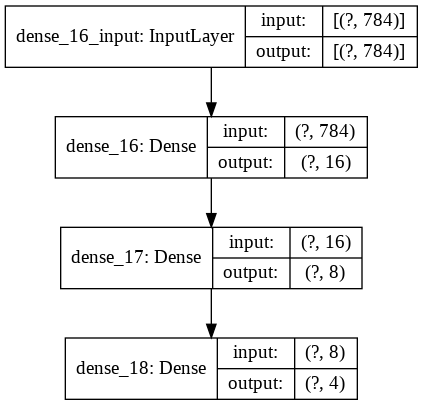

In [7]:
from tensorflow import keras

# Defining a sequential model
model1 = keras.Sequential()

# Add first input layer 
model1.add(keras.layers.Dense( 16, activation= 'relu', input_shape =(28*28,)))

# Add hidden layer
model1.add(keras.layers.Dense(8,activation='relu'))

# Add output layer 
model1.add(keras.layers.Dense(4,activation='softmax'))

# Compilation of the NN with optimizer and loss funtion 
model1.compile('adam', loss = 'categorical_crossentropy') # loss funtion used in multi class classification

print(model1.summary())
tf.keras.utils.plot_model(model1, show_shapes=True)

#### NN with Keras Functional API

* Flexibility of connecting arbitrary layers.

* Training two models possible with funtional API.

Eg. sesame neural network (Comparing two outputs for classfication)

Model_1 : To predict the class of an image.

Model_2 : To predict the metadata of the image.

**Note** : Previous layer should be passed as input to the current layer for connection.



Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 784)]        0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 10)]         0                                            
__________________________________________________________________________________________________
dense_19 (Dense)                (None, 12)           9420        input_3[0][0]                    
__________________________________________________________________________________________________
dense_21 (Dense)                (None, 12)           132         input_4[0][0]                    
_______________________________________________________________________________________

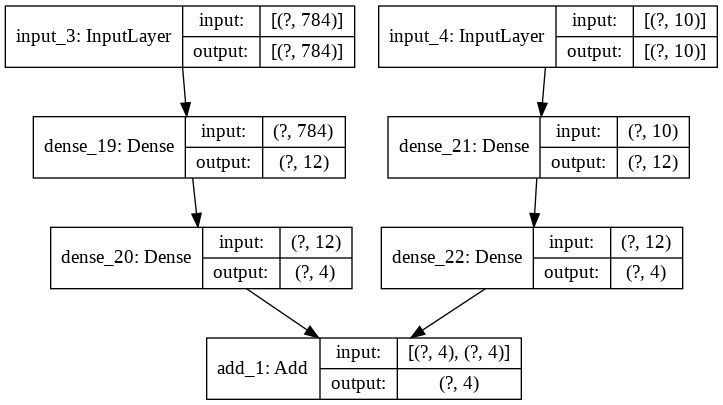

In [8]:
import tensorflow as tf

# Define model 1 input layer
model1_inputs = tf.keras.Input(shape=(28*28,))

# Define model 2 input layer
model2_inputs = tf.keras.Input(shape=(10,))

# Layer 1 for model 1
model1_layer1 = tf.keras.layers.Dense(12,activation='relu')(model1_inputs)

# Layer 2 for model 1
model1_layer2 = tf.keras.layers.Dense(4,activation='softmax')(model1_layer1)

# Layer 1 for model 2
model2_layer1 = tf.keras.layers.Dense(12,activation='relu')(model2_inputs)

# Layer 2 for model 2
model2_layer2 = tf.keras.layers.Dense(4,activation='softmax')(model2_layer1)

# Merge model1 and model2
merged = tf.keras.layers.add([model1_layer2,model2_layer2])

# Define a functional model
model = tf.keras.Model(inputs = [model1_inputs,model2_inputs], outputs = merged)

# Compile the model
model.compile('adam',loss = 'categorical_crossentropy')

print(model.summary())
tf.keras.utils.plot_model(model, show_shapes=True)

### Training and Evaluation with Keras

#### Training



Train model:
    
      model.fit(image_features,image_labels)

Required arguments:

* Features
* labels

Optional arguments:

* Batch_size 
    * Number of training examples used in training (learning).
        * Entire training set.
        * Each training example.
        * mini batches of training set.
    * Default size = 32.
    * **Weights updated** after each batch of training.

* Epochs
    * Number of times each batch_size is trained for learning.
    * Using multiple epochs will make the model revisit the same batches with **different hyper parameters** ( used to control learing process) to reduce loss.

* Validation_split
  * Divides the training data into train and validation set.
        # Train model with 20% validation split
        model.fit(features, labels, epochs=10, validation_split =0.20)
  * Usefull to assess the data trained on the new validation set.

        Training loss < validation loss => Overfitting.
  
  * Add metrics such as accuracy to measure performance on validation set.

        # Recompile the model with the accuracy metrics
        model.compile('adam',loss = 'categorical_crossentropy',metrics=['accuracy'])
        
        # Train model with validation split
        model.fit(features, labels, epochs=10, validation_split =0.20)



#### Evaluation 

Evaluate the model on test set

      model.evaluate(test)

### Training models withh Estimator API

Estimators API:

* High-level TensorFlow API submodule.
* Less Flexible.
  * Enforces best practices for model architecture and training.
* Faster deployment (less code)
* Many premade models 


Model specification and training pipeline:

1. Define feature columns (type,size)
2. Load and transform data within a function as dictionary of features, labels.
3. Define an estimator (premade/custom)
4. Apply trian, validate, evaluate operation.



```
import tensorflow as tf

# Numeric feature column "size" (Dictionary key)
# Done for every feature 
size = tf.feature_column.numeric_column("size") 

# Categorical feature column
rooms = tf.feature_column.categorical_column_with_vocabulary_list("rooms",\
["1","2","3","4","5"])

# Merge as feature_list
feature_list = [size,rooms]

# Input data function dictionary (feature,labels) 
def input_fn():

  # Define feature dictionary (which maps to feature columns defined)
  features = {"size": [123,123,12312],"rooms":[1,3,4]}

  # define labels
  labels= [21213123,111134,980000]

  # Define labels
  return features, labels

# Define the estimator for training
# Deep neural network regression for continuous variables with hidden layers and output layer
model  tf.estimator.DNNRegressor(feature_columns=feature_list,\
        hidden_units=[10,6,6,3])

# Deep neural network classifier with 4 classes
model 1 = tf.estimator.DNNClassifier(feature_columns= feature_list,\
          hidden_units=[32,16,8], n_classes=4)

#Train the model
model.train(input_fn, steps=20)

```

